In [733]:
import pandas as pd

In [734]:
#tours csv dataframe
tours = pd.read_csv('/Users/barry/n3xtcoder/data/24-04-24/Tour.csv')

In [735]:
#complaints csv dataframe
complaints = pd.read_csv('data/24-04-24/Reklamationen.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_12008/3590055005.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('data/24-04-24/Reklamationen.csv')


In [736]:
pd.set_option('display.max_columns', None)

In [737]:
len(tours)

138953

In [738]:
#there is a fair few duplicates to get rid of
tours = tours.drop_duplicates()

In [739]:
len(tours)

95349

In [740]:
#these are not full duplicates. We're only interested in the complaint reason 901. If this happens all subsequent tasks on 
#that tour also get marked with this reason. We're only interested in the first instance of this reason.
complaints = complaints.drop_duplicates(subset='%TOURNR', keep='first')

In [741]:
#isolating the 901 reason 'Tour nicht geschafft'
complaints = complaints[complaints.Reklamationsgrund == 901.0]

In [742]:
complaints.head()

,%TOURNR,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
100,163663,A240916831,901,Tour nicht geschafft,Tourüberlastung
682,166324,A241175733,901,Tour nicht geschafft,Fahrzeugausfall
725,121217,A241176514,901,Tour nicht geschafft,Tourüberlastung
750,166005,A241185159,901,Tour nicht geschafft,Tourüberlastung
753,121221,A241185282,901,Tour nicht geschafft,Tourüberlastung


In [743]:
tours.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335


In [744]:
#i'm doing a left join here. This means all tours are kept and only the complaints that match are added to the dataframe.
tours_join_complaints = pd.merge(tours, complaints, on='%TOURNR', how='left')

In [745]:
tours_join_complaints[tours_join_complaints.Reklamationsgrund == 901.0].head(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
358,14094,27.12.2023,MONU,1,TP00335,A234530422,901.0,Tour nicht geschafft,Zeitarbeiterproblem
367,18690,15.04.2021,MONU,1,TP00335,A211251520,901.0,Tour nicht geschafft,NaN
1360,39368,30.06.2022,MONU,2,TP00336,A222253580,901.0,Tour nicht geschafft,Tourüberlastung
1522,25310,04.12.2023,MONU,2,TP00336,A234247715,901.0,Tour nicht geschafft,Fahrzeugausfall
2720,59206,14.10.2021,MONU,4,TP00342,A213546939,901.0,Tour nicht geschafft,NaN
3085,66775,02.11.2022,MONU,4,TP00342,A223849279,901.0,Tour nicht geschafft,Fahrzeugausfall
4962,12752,04.12.2023,MONU,7,TP00349,A234245724,901.0,Tour nicht geschafft,Fahrzeugausfall
5309,95306,06.12.2023,MONU,7,TP00349,A234290562,901.0,Tour nicht geschafft,Zeitarbeiterproblem
5444,34449,08.11.2021,MONU,7,TP00349,A213816212,901.0,Tour nicht geschafft,NaN
5671,31297,20.06.2022,MONU,8,TP00401,A222105779,901.0,Tour nicht geschafft,Fahrzeugausfall


In [746]:
len(tours)

95349

In [747]:
#double checking that the len of tours_join_complaints is the same as the original tours dataframe
len(tours_join_complaints)

95349

In [748]:
#to get a sense of how many complaints of 'tour nicht geschafft' there are
tours_join_complaints.Reklamationsgrund.value_counts()

Reklamationsgrund
901.0    1233
Name: count, dtype: int64

In [749]:
len(tours_join_complaints[tours_join_complaints.Reklamationsgrund == 901.0])

1233

In [750]:
#this is the percentage of tours that ARE successfully completed. The amount which are 'unsuccessful' is the inverse of this. 1.13%
(len(tours_join_complaints)-len(tours_join_complaints[tours_join_complaints.Reklamationsgrund == 901.0]))/len(tours_join_complaints) *100

98.70685586634364

In [751]:
#this is an aside to just double check that w're not missing any complaints that might be relevant to our analysis
complaints2 = pd.read_csv('data/24-04-24/Reklamationen.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_12008/1281685158.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints2 = pd.read_csv('data/24-04-24/Reklamationen.csv')


In [752]:
complaints2.Grund.unique()

array(['BB Deckel beschädigt', 'Ü Ladestelle beräumt',
       'VSS Schlüssel/Code erforderlich',
       'NB nicht bereitgestellter Behälter', 'TV Transportweg versperrt',
       'CT/AK Container/Mulde  defekt',
       'Leerung ist erfolgt - Foto erstellt',
       'Freilaufender Hund - GS nicht betreten',
       'Standort für Behälter unklar', 'TB Transportweg Baustelle',
       'VS kein Schlüssel erforderlich', 'Tour nicht geschafft',
       'Behälter zu schwer', 'RC Behälter vermüllt', 'BB Rad beschädigt',
       'VST Tresorproblem', 'leerer Behälter - 0 Menge -',
       'Ü nur Behälter geladen', 'Z3 Schloss fehlt od. defekt',
       'Behälter-Rumpf defekt', 'BB Zapfen beschädigt',
       'VB Verdreckter Behälter', 'Behälter zuviel',
       'LV Ladestelle vermüllt', 'Ü Erhöhung erforderlich',
       'Rattenbefall - keine Leerung', 'Fahrstuhl defekt', 'Fremdtonne',
       'Behälter in Schüttung gefallen', 'Brenner - Behälter beschädigt',
       'CT/AK - Leerfahrt', 'Fahrzeugausfall/Fah

In [753]:
tours_join_complaints.Reklamationsgrund.unique()

array([ nan, 901.])

In [754]:
# a random sample of the tours. the successful tours are marked with NaN
tours_join_complaints.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
81186,34816,04.08.2023,MONU,120,TAK0001,NaN,NaN,NaN,NaN
22718,15266,15.12.2023,MONU,35,TG00022,NaN,NaN,NaN,NaN
38102,36678,13.01.2022,MONU,59,TMSPM-GB01,NaN,NaN,NaN,NaN
64596,25941,08.04.2022,MONU,96,TP00312,NaN,NaN,NaN,NaN
23907,80725,27.03.2023,MONU,37,TG00031,NaN,NaN,NaN,NaN
82724,35762,30.11.2021,MONU,122,TCT0003,NaN,NaN,NaN,NaN
36479,11781,13.01.2021,MONU,55,TG00036,NaN,NaN,NaN,NaN
69891,27552,28.04.2022,MONU,103,TP00317,NaN,NaN,NaN,NaN
53127,26373,12.04.2022,MONU,81,TP00421,NaN,NaN,NaN,NaN
67076,94265,03.01.2023,MONU,100,TP00215,NaN,NaN,NaN,NaN


In [755]:
#this is the CSV related to employees. how many there are, if thye are 'Zeitarbeiter' and if the tour had the main driver
resources = pd.read_csv('data/24-04-24/Ressource.csv')

In [756]:
#a tour can have multiple employees. Thus a tour can have multiple rows in the resources dataframe.
#I'm grouping by the tour number and counting the number of employees on each tour by counting the number of rows.
exmployee_count = resources.groupby('%TOURNR').count().reset_index()[['%TOURNR', '%Mitarbeiternummer']]

In [757]:
#here we want to do a similar groupby but instead of counting the rows we are summing the values.
#if a row has a 1 in the zeit arbieter flag and the same tour has another row, meaning another mitarbeiter, who also has this one
#that means we have 2 Zeitarbeiters - similar logic for the 'Ressource.Erster Fahrer' column
summed_employee_flags = resources.groupby('%TOURNR').sum().reset_index()[['%TOURNR', 'Zeitarbeiter_Flag', 'Ressource.Erster Fahrer']]

In [758]:
#Join those two tables to get the 'counted' employees and the 'summed' zeitarbeiter and main driver
processed_employees = pd.merge(exmployee_count, summed_employee_flags, on='%TOURNR', how='inner')

In [759]:
processed_employees = processed_employees.rename(columns={'%Mitarbeiternummer': 'employee_count'})

In [760]:
#employee_count = resources.groupby('%TOURNR').count()

In [761]:
processed_employees.sample(20)

,%TOURNR,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer
90474,90492,1,0,1
83107,83122,2,0,1
147772,147802,3,0,1
131286,131316,3,1,1
122480,122510,2,1,1
163139,163169,2,0,1
26613,26617,2,0,1
147610,147640,2,1,1
54519,54531,2,0,1
32736,32743,2,0,1


In [762]:
#now join that table to my combined tours/complaints table
tours_join_complaints_employees = pd.merge(tours_join_complaints, processed_employees, on='%TOURNR', how='left')

In [763]:
tours_join_complaints_employees.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer
0,12964,10.11.2023,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,0.0,1.0
1,38897,07.02.2022,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,1.0,1.0
2,73190,21.10.2022,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,1.0,1.0
3,54020,06.08.2021,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,1.0,1.0
4,78256,27.01.2023,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,0.0,1.0


In [764]:
#lets add in my tasks table
tasks = pd.read_csv('data/24-04-24/Auftr„ge.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_12008/1245601721.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tasks = pd.read_csv('data/24-04-24/Auftr„ge.csv')


In [765]:
tasks = tasks.drop_duplicates()


In [766]:
#A tour can have many tasks in it. I want to see how many each Tour has and then join that to my main table

number_of_tasks = tasks.groupby('%TOURNR').count().reset_index()[['%TOURNR','Artikel']]

In [767]:
#The tours have more tasks that i expected. The column is called 'Artikel' but that is arbitrary, i needed a column to keep the tally.
#I'll change the name shortly
number_of_tasks.head()

,%TOURNR,Artikel
0,1,182
1,2,152
2,3,152
3,4,170
4,5,151


In [768]:
#lets add this tasks count to teh main table
tours_join_complaints_employees_taskcoount = pd.merge(tours_join_complaints_employees, number_of_tasks, on='%TOURNR', how='left')

In [769]:
#lets rename the Article column to task_count to keep track of it
tours_join_complaints_employees_taskcoount = tours_join_complaints_employees_taskcoount.rename(columns={'Artikel': 'task_count'})

In [770]:
#lets have a look at a random sample of 20 to see if its being as we expect it to be
tours_join_complaints_employees_taskcoount.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count
44893,56373,25.02.2022,MONU,69,TP00114,NaN,NaN,NaN,NaN,2.0,0.0,1.0,211.0
46442,42650,13.07.2021,MONU,71,TP00119,NaN,NaN,NaN,NaN,2.0,0.0,1.0,184.0
89884,61880,27.07.2022,MONU,135,TP00348,NaN,NaN,NaN,NaN,2.0,1.0,1.0,139.0
52661,57537,20.09.2023,MONU,80,TG00661,NaN,NaN,NaN,NaN,4.0,3.0,1.0,1.0
25812,44378,25.08.2021,MONU,39,TG00034,NaN,NaN,NaN,NaN,2.0,0.0,1.0,339.0
70333,16867,30.03.2021,MONU,104,TP00318,NaN,NaN,NaN,NaN,2.0,0.0,1.0,305.0
31544,13216,26.01.2021,MONU,47,TM00008,NaN,NaN,NaN,NaN,2.0,0.0,1.0,74.0
4123,37818,26.01.2022,MONU,6,TP00344,NaN,NaN,NaN,NaN,2.0,1.0,1.0,141.0
40302,82989,09.03.2023,MONU,62,TT00003,NaN,NaN,NaN,NaN,2.0,1.0,1.0,24.0
54938,55143,19.08.2021,MONU,84,TM00001,NaN,NaN,NaN,NaN,2.0,1.0,1.0,55.0


In [771]:
#double checking what the tours CSV was like
tours.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335


In [772]:
#My understaind is that every time the truck leaves it gets a unique 'tourNr'. If this route is a regular route it gets a 
#Rahmentour number as well. To keep track of how many tours are in each Rahmentour i'm going to group by that column and count
#Rahmentour with number 3 occurred 801 times
tours.groupby('%Rahmentour').count()

,%TOURNR,Einsatzdatum,Betriebsstätte,Rahmentourcode
%Rahmentour,,,,
1,800,800,800,800
2,790,790,790,790
3,801,801,801,801
4,785,785,785,785
5,781,781,781,781
...,...,...,...,...
195,1,1,1,1
196,1,1,1,1
197,1,1,1,1


In [773]:
#there is some surprise at the number of tasks in a tour. This is to isolate it for one tour, 6276 and to double check that the 
#count/summing above is correct... It appears to be. The TOURNR is the same, all on the one date, with unique Auftr.Auftragsnr for each 
#task and a changing %DEBITOR%EINSATZSTELLE for each pick up location
tasks[tasks['%TOURNR'] == 6276]

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
2350808,6276,6477,A233037454,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
2493451,6276,55846,A233051474,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
2493488,6276,83418,A233051615,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
2493532,6276,83417,A233051612,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
3357645,6276,44250,A233049476,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
...,...,...,...,...,...,...,...,...,...,...
7619821,6276,89146,A233035750,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB
7619858,6276,6075,A233035795,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB
7620163,6276,36851,A233034779,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB
7620690,6276,50790,A233023465,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB


In [774]:
#NOTE for tomorrow - I want work out the average number of tasks for each rahmen tour to see if the number of tasks is a factor in
#the success of the tour. I also want to see if the number of employees is a factor in the success of the tour. Possiblying having a
# column that shows if the tour had more or less or the average number of employees for that tour.

In [775]:
tours.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335


In [776]:
resources.head(1)

,%TOURNR,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer
0,95350,1,0,1


In [777]:
resources_tours = pd.merge(resources, tours, on='%TOURNR', how='inner')

In [778]:
resources_tours.head(20)

,%TOURNR,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,1,278,0,1,22.08.2023,MONU,1,TP00335
1,1,279,0,0,22.08.2023,MONU,1,TP00335
2,2,280,0,1,22.08.2023,MONU,2,TP00336
3,2,281,1,0,22.08.2023,MONU,2,TP00336
4,3,239,0,1,22.08.2023,MONU,3,TP00337
5,3,282,1,0,22.08.2023,MONU,3,TP00337
6,4,283,0,1,22.08.2023,MONU,4,TP00342
7,4,284,1,0,22.08.2023,MONU,4,TP00342
8,5,285,0,1,22.08.2023,MONU,5,TP00343
9,5,286,0,0,22.08.2023,MONU,5,TP00343


In [779]:
grouped = resources_tours.groupby(['%TOURNR', '%Rahmentour']).count().reset_index()

In [780]:
grouped.head()

,%TOURNR,%Rahmentour,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer,Einsatzdatum,Betriebsstätte,Rahmentourcode
0,1,1,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2
2,3,3,2,2,2,2,2,2
3,4,4,2,2,2,2,2,2
4,5,5,2,2,2,2,2,2


In [781]:
sorted_grouped = grouped.sort_values(by='%Rahmentour')

In [782]:
sorted_grouped = sorted_grouped[['%TOURNR','%Rahmentour','%Mitarbeiternummer']]

In [783]:
sorted_grouped = sorted_grouped.rename(columns={'%Mitarbeiternummer': 'employee_count'})

In [784]:
sorted_grouped.head(20)

,%TOURNR,%Rahmentour,employee_count
0,1,1,2
80644,80659,1,3
80570,80585,1,3
30456,30463,1,2
57410,57423,1,2
30342,30349,1,2
1157,1158,1,2
57163,57176,1,2
80401,80416,1,2
80319,80334,1,3


In [785]:
average_employee_count = sorted_grouped.groupby('%Rahmentour')['employee_count'].mean().reset_index()

In [786]:
average_employee_count

,%Rahmentour,employee_count
0,1,2.226250
1,2,2.149367
2,3,2.131086
3,4,2.095541
4,5,2.153649
...,...,...
194,195,1.000000
195,196,2.000000
196,197,4.000000
197,198,2.000000


In [787]:
everything_table = pd.merge(tours_join_complaints_employees_taskcoount, average_employee_count, on = '%Rahmentour', how = 'inner' )

In [788]:
everything_table = everything_table.rename(columns={'employee_count_x': 'employee_count', 'employee_count_y': 'average_employee_count'})

In [789]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count
32414,87555,14.06.2023,MONU,49,TM00010,NaN,NaN,NaN,NaN,2.0,1.0,1.0,90.0,2.261965
79317,90894,03.05.2023,MONU,117,TP00314,NaN,NaN,NaN,NaN,2.0,0.0,1.0,169.0,2.313776
37784,6889,24.07.2023,MONU,58,TPIGLU0751,NaN,NaN,NaN,NaN,1.0,0.0,1.0,17.0,1.131148
28056,15841,19.03.2021,MONU,43,TM00004,NaN,NaN,NaN,NaN,2.0,1.0,1.0,63.0,2.154430
84018,27243,25.04.2022,MONU,124,TCT0005,NaN,NaN,NaN,NaN,1.0,0.0,1.0,5.0,1.001520
47392,94556,09.01.2023,MONU,72,TP00211,NaN,NaN,NaN,NaN,3.0,2.0,1.0,164.0,2.220126
801,77498,19.01.2023,MONU,2,TP00336,NaN,NaN,NaN,NaN,2.0,0.0,1.0,140.0,2.149367
55125,84313,25.10.2023,MONU,84,TM00001,NaN,NaN,NaN,NaN,2.0,0.0,1.0,64.0,2.006337
68529,61229,20.07.2022,MONU,101,TP00315,NaN,NaN,NaN,NaN,2.0,0.0,1.0,120.0,2.321429
65085,54035,06.08.2021,MONU,97,TP00341,NaN,NaN,NaN,NaN,3.0,1.0,1.0,167.0,2.256378


In [790]:
everything_table[everything_table.Rahmentourcode == 'TP00433']

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count
10458,64927,07.09.2022,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,1.0,1.0,NaN,2.262895
10459,34981,22.11.2021,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,0.0,1.0,159.0,2.262895
10460,11200,16.11.2023,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,2.0,1.0,149.0,2.262895
10461,27513,26.04.2022,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,134.0,2.262895
10462,79764,13.03.2023,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,237.0,2.262895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,32179,16.05.2022,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,1.0,1.0,164.0,2.262895
11055,59879,25.10.2021,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,160.0,2.262895
11056,33768,29.10.2021,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,1.0,1.0,141.0,2.262895
11057,77914,16.02.2023,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,173.0,2.262895


#I want to add tour times

In [791]:
tour_times = pd.read_csv('data/24-04-24/Tour_times.csv')

In [792]:
tour_times.head(1)

,%TOURNR,Einsatzdatum,Startuhrzeit,Endeuhrzeit,Ausgangspunkt
0,50486,02.01.2021,00:00:00,00:00:00,NaN


In [793]:
everything_table.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count
0,12964,10.11.2023,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,0.0,1.0,149.0,2.22625


In [794]:
everything_table = pd.merge(everything_table, tour_times, on=['%TOURNR', 'Einsatzdatum'], how='inner')

In [795]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt
64962,73527,02.12.2022,MONU,97,TP00341,NaN,NaN,NaN,NaN,3.0,0.0,1.0,173.0,2.256378,06:03:22,13:45:54,BR_MONU
9128,28935,28.04.2021,MONU,12,TP00422,NaN,NaN,NaN,NaN,2.0,1.0,1.0,159.0,2.133903,05:59:44,15:54:55,NaN
10458,64927,07.09.2022,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,1.0,1.0,NaN,2.262895,00:00:00,00:00:00,BR_NOBEL
9233,8891,27.11.2023,MONU,12,TP00422,NaN,NaN,NaN,NaN,2.0,1.0,1.0,131.0,2.133903,05:27:34,12:41:54,BR_MONU
38375,79653,13.03.2023,MONU,59,TMSPM-GB01,NaN,NaN,NaN,NaN,2.0,0.0,1.0,6.0,2.297297,05:54:26,12:20:24,BR_MONU
41480,42356,12.07.2021,MONU,64,TT00005,NaN,NaN,NaN,NaN,1.0,0.0,1.0,26.0,1.833333,00:00:00,00:00:00,BR_MONU
24325,60280,11.07.2022,MONU,37,TG00031,NaN,NaN,NaN,NaN,2.0,0.0,1.0,107.0,2.075899,05:37:13,13:27:22,BR_WESTH
21421,83882,19.06.2023,MONU,34,TG00021,A232125594,901.0,Tour nicht geschafft,Tourüberlastung,2.0,1.0,1.0,100.0,2.087533,05:17:41,13:18:28,BR_WESTH
5004,518,05.01.2023,MONU,7,TP00349,NaN,NaN,NaN,NaN,2.0,1.0,1.0,143.0,2.021601,05:34:18,13:37:28,BR_MONU
16348,74833,10.08.2022,MONU,25,TCT0010,NaN,NaN,NaN,NaN,1.0,0.0,1.0,4.0,1.000000,00:00:00,00:00:00,NaN


In [796]:
everything_table.Einsatzdatum = pd.to_datetime(everything_table.Einsatzdatum, format="%d.%m.%Y")

In [797]:
everything_table['year'] = everything_table.Einsatzdatum.dt.year

In [798]:
everything_table['month'] = everything_table.Einsatzdatum.dt.month_name()
everything_table['month_number'] = everything_table.Einsatzdatum.dt.month
everything_table['day'] = everything_table.Einsatzdatum.dt.day_name()
everything_table['day_number'] = everything_table.Einsatzdatum.dt.day



In [799]:
everything_table['rubbish_type'] = everything_table['Rahmentourcode'].str.extract(r'(\D+)')

In [800]:
rahmehentour_values = everything_table['%Rahmentour'].value_counts().to_list()

In [801]:
rahmentourcode_values = everything_table['Rahmentourcode'].value_counts().to_list()

In [802]:
if rahmehentour_values == rahmentourcode_values:
    print('They are the same')

They are the same


In [803]:
everything_table.to_pickle('data/24-04-24/everything_table.pkl')

In [804]:
everything_table[everything_table['Rahmentourcode'] == 'TP00334']

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type
49229,53068,2021-06-22,MONU,75,TP00334,NaN,NaN,NaN,NaN,3.0,1.0,1.0,412.0,4.298526,05:42:50,14:32:41,NaN,2021,June,6,Tuesday,22,TP
49230,87822,2023-08-22,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,259.0,4.298526,06:02:44,13:21:37,BR_RUDOWER,2023,August,8,Tuesday,22,TP
49231,4738,2023-06-08,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,352.0,4.298526,05:56:51,14:12:10,BR_RUDOWER,2023,June,6,Thursday,8,TP
49232,77255,2023-08-08,MONU,75,TP00334,NaN,NaN,NaN,NaN,5.0,3.0,1.0,259.0,4.298526,06:17:45,12:48:49,BR_RUDOWER,2023,August,8,Tuesday,8,TP
49233,81435,2023-04-06,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,346.0,4.298526,06:00:02,13:51:13,BR_RUDOWER,2023,April,4,Thursday,6,TP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50038,82001,2023-03-01,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,280.0,4.298526,05:36:21,13:14:50,BR_RUDOWER,2023,March,3,Wednesday,1,TP
50039,79431,2023-02-23,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,5.0,1.0,359.0,4.298526,07:03:26,14:16:20,BR_NOBEL,2023,February,2,Thursday,23,TP
50040,53732,2021-08-25,MONU,75,TP00334,NaN,NaN,NaN,NaN,2.0,1.0,1.0,318.0,4.298526,05:43:52,14:39:10,NaN,2021,August,8,Wednesday,25,TP
50041,8569,2023-10-09,MONU,75,TP00334,NaN,NaN,NaN,NaN,5.0,3.0,1.0,415.0,4.298526,05:43:58,14:12:42,BR_RUDOWER,2023,October,10,Monday,9,TP


In [805]:
len(tasks)

13242155

In [806]:
tasks = tasks.drop_duplicates()
len(tasks)

13242155

In [807]:
tasks.head()

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen


In [808]:
everything_table[everything_table['%TOURNR'] == 82001]

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type
50038,82001,2023-03-01,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,280.0,4.298526,05:36:21,13:14:50,BR_RUDOWER,2023,March,3,Wednesday,1,TP


In [809]:
tasks[tasks['%TOURNR'] == 82001]

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
379407,82001,27325,A230752989,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
379429,82001,3572,A230746052,01.03.2023,2,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
1972480,82001,41169,A230754343,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
1972681,82001,21720,A230752529,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
1972778,82001,82882,A230756594,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
...,...,...,...,...,...,...,...,...,...,...
9703594,82001,63870,A230748717,01.03.2023,3,Stück,10040.0,M610200,"5.01 Altpapier, gemischt",240 L MGB
13140698,82001,20643,A230752418,01.03.2023,1,Stück,10060.0,M610200,"5.01 Altpapier, gemischt",360 L MGB
13141334,82001,33085,A230753332,01.03.2023,3,Stück,10060.0,M610200,"5.01 Altpapier, gemischt",360 L MGB
13141462,82001,40967,A230755410,01.03.2023,1,Stück,10060.0,M610200,"5.01 Altpapier, gemischt",360 L MGB


In [810]:
tasks_copy  = tasks.copy()

In [811]:
rahmentour_code = everything_table[['%TOURNR','Rahmentourcode']]

In [812]:
tasks.head()

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen


In [813]:
# original
tasks_copy = pd.merge(tasks_copy, rahmentour_code, on='%TOURNR', how='left')

# tasks_copy = pd.merge(tasks_copy, rahmentour_code, on='%TOURNR', how='inner')

In [814]:
tasks_copy.head()

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel,Rahmentourcode
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0014
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0014
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0004
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0004
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0014


In [815]:
tasks_copy2 = tasks_copy.groupby(['%TOURNR', 'Rahmentourcode']).count().reset_index()

In [816]:
tasks_copy2.head()

,%TOURNR,Rahmentourcode,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,1,TP00335,182,182,182,182,182,182,182,182,182
1,2,TP00336,152,152,152,152,152,152,152,152,152
2,3,TP00337,152,152,152,152,152,152,152,152,152
3,4,TP00342,170,170,170,170,170,170,170,170,170
4,5,TP00343,151,151,151,151,151,151,151,151,151


In [817]:
tasks_copy2_group = tasks_copy2.groupby('Rahmentourcode')['Artikel'].mean().reset_index()

In [818]:
tasks_copy2_group = tasks_copy2_group.rename(columns={'Artikel': 'average_tasks'})

In [819]:
tasks_copy2_group.sort_values(by='average_tasks', ascending=False)

,Rahmentourcode,average_tasks
146,TP00334,346.202771
131,TP00318,307.929577
141,TP00329,284.872340
107,TP00118,276.418043
130,TP00317,263.078105
...,...,...
182,TSL0001,0.800000
29,TCTWBS005,0.750000
192,TT00009,0.700000
8,TAKWBS006,0.000000


In [820]:
everything_table.sample(10)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type
70300,65185,2022-09-23,MONU,104,TP00318,NaN,NaN,NaN,NaN,3.0,0.0,1.0,316.0,2.243278,05:02:25,14:46:33,BR_MONU,2022,September,9,Friday,23,TP
81224,27048,2022-04-21,MONU,120,TAK0001,NaN,NaN,NaN,NaN,1.0,0.0,1.0,5.0,1.052098,00:00:00,00:00:00,NaN,2022,April,4,Thursday,21,TAK
31546,92088,2023-09-12,MONU,47,TM00008,NaN,NaN,NaN,NaN,3.0,1.0,1.0,93.0,2.164331,05:19:49,12:55:36,BR_MONU,2023,September,9,Tuesday,12,TM
49206,28820,2021-05-06,MONU,74,TP00332,NaN,NaN,NaN,NaN,2.0,1.0,1.0,134.0,2.255668,05:45:46,14:54:20,NaN,2021,May,5,Thursday,6,TP
6573,78382,2023-01-30,MONU,9,TP00402,NaN,NaN,NaN,NaN,3.0,1.0,1.0,160.0,2.657993,05:18:33,13:10:06,BR_HULT,2023,January,1,Monday,30,TP
39724,51968,2023-10-11,MONU,61,TT00002,NaN,NaN,NaN,NaN,2.0,1.0,1.0,30.0,1.887671,00:00:00,00:00:00,BR_MONU,2023,October,10,Wednesday,11,TT
94695,42897,2021-07-14,MONU,171,TP00301,NaN,NaN,NaN,NaN,2.0,0.0,1.0,228.0,2.111675,09:05:59,14:49:48,NaN,2021,July,7,Wednesday,14,TP
75304,2941,2023-04-27,MONU,110,TP00326,NaN,NaN,NaN,NaN,2.0,0.0,1.0,222.0,2.174079,05:48:28,14:32:16,BR_MONU,2023,April,4,Thursday,27,TP
53022,76773,2022-11-10,MONU,81,TP00421,NaN,NaN,NaN,NaN,2.0,0.0,1.0,178.0,2.180000,06:20:21,14:26:46,BR_MONU,2022,November,11,Thursday,10,TP
5468,93893,2022-12-27,MONU,7,TP00349,NaN,NaN,NaN,NaN,2.0,1.0,1.0,169.0,2.021601,05:36:23,14:27:01,BR_MONU,2022,December,12,Tuesday,27,TP


In [821]:
everything_table = pd.merge(everything_table, tasks_copy2_group, on='Rahmentourcode', how='left')

In [822]:
everything_table.columns

Index(['%TOURNR', 'Einsatzdatum', 'Betriebsstätte', '%Rahmentour',
       'Rahmentourcode', 'Belegnr.', 'Reklamationsgrund', 'Grund',
       'Reklamationsuntergrund Beschreibung', 'employee_count',
       'Zeitarbeiter_Flag', 'Ressource.Erster Fahrer', 'task_count',
       'average_employee_count', 'Startuhrzeit', 'Endeuhrzeit',
       'Ausgangspunkt', 'year', 'month', 'month_number', 'day', 'day_number',
       'rubbish_type', 'average_tasks'],
      dtype='object')

In [823]:
everything_table = everything_table[['%TOURNR',
                            'Einsatzdatum',
                            'Betriebsstätte',
                            '%Rahmentour',
                            'Rahmentourcode',
                            'Belegnr.',
                            'Grund',
                            'Reklamationsuntergrund Beschreibung', 
                            'Startuhrzeit',
                            'Endeuhrzeit',
                            'Ausgangspunkt',
                            'year',
                            'month',
                            'month_number',
                            'day',
                            'day_number',
                            'rubbish_type',
                            'Zeitarbeiter_Flag',
                            'Ressource.Erster Fahrer', 
                            'employee_count',
                            'average_employee_count',
                            'average_tasks',
                            'task_count',
                            'Reklamationsgrund']]

In [824]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
8561,960,2023-07-20,MONU,11,TP00347,NaN,NaN,NaN,05:43:11,13:29:46,BR_MONU,2023,July,7,Thursday,20,TP,1.0,1.0,2.0,2.447059,152.177215,159.0,NaN
94960,11805,2021-01-18,MONU,172,TG00026,NaN,NaN,NaN,05:38:26,13:28:14,NaN,2021,January,1,Monday,18,TG,0.0,1.0,2.0,2.112583,182.566667,191.0,NaN
15267,37468,2022-02-02,MONU,23,TP00214,NaN,NaN,NaN,05:26:14,13:38:32,NaN,2022,February,2,Wednesday,2,TP,1.0,1.0,2.0,2.150442,234.786718,350.0,NaN
25003,15774,2021-03-22,MONU,38,TG00032,NaN,NaN,NaN,05:36:16,13:53:06,NaN,2021,March,3,Monday,22,TG,0.0,1.0,2.0,2.076923,213.868766,273.0,NaN
42130,74967,2022-08-11,MONU,65,TT00BG01,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2022,August,8,Thursday,11,TT,0.0,1.0,2.0,1.030391,10.986547,3.0,NaN
74499,82675,2023-03-03,MONU,109,TP00324,NaN,NaN,NaN,05:28:49,14:10:23,BR_MONU,2023,March,3,Friday,3,TP,0.0,1.0,2.0,2.279543,213.571247,206.0,NaN
3548,42478,2021-07-09,MONU,5,TP00343,NaN,NaN,NaN,06:20:48,14:50:21,NaN,2021,July,7,Friday,9,TP,1.0,1.0,2.0,2.153649,147.905006,150.0,NaN
41957,31603,2022-06-23,MONU,64,TT00005,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2022,June,6,Thursday,23,TT,1.0,1.0,2.0,1.833333,21.410663,39.0,NaN
15939,17531,2021-04-09,MONU,24,TG00024,NaN,NaN,NaN,05:04:06,12:37:48,NaN,2021,April,4,Friday,9,TG,1.0,1.0,2.0,2.147059,214.981132,247.0,NaN
68310,23400,2021-02-09,MONU,101,TP00315,NaN,NaN,NaN,05:50:01,15:36:23,NaN,2021,February,2,Tuesday,9,TP,1.0,1.0,2.0,2.321429,188.559387,232.0,NaN


I want to have a binary column to hold wheter its Raklamation code == 901.0

In [825]:
everything_table.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
0,12964,2023-11-10,MONU,1,TP00335,NaN,NaN,NaN,05:37:11,13:08:06,BR_RUDOWER,2023,November,11,Friday,10,TP,0.0,1.0,2.0,2.22625,164.097592,149.0,NaN
1,38897,2022-02-07,MONU,1,TP00335,NaN,NaN,NaN,05:24:19,13:51:36,NaN,2022,February,2,Monday,7,TP,1.0,1.0,2.0,2.22625,164.097592,153.0,NaN
2,73190,2022-10-21,MONU,1,TP00335,NaN,NaN,NaN,05:17:54,13:47:48,BR_NOBEL,2022,October,10,Friday,21,TP,1.0,1.0,2.0,2.22625,164.097592,144.0,NaN
3,54020,2021-08-06,MONU,1,TP00335,NaN,NaN,NaN,05:22:22,15:59:07,NaN,2021,August,8,Friday,6,TP,1.0,1.0,2.0,2.22625,164.097592,175.0,NaN
4,78256,2023-01-27,MONU,1,TP00335,NaN,NaN,NaN,05:24:08,13:32:08,BR_NOBEL,2023,January,1,Friday,27,TP,0.0,1.0,2.0,2.22625,164.097592,143.0,NaN


In [826]:
everything_table[(everything_table['Rahmentourcode'] == 'TG00031') & (everything_table['%TOURNR'] == 62050)]

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
23991,62050,2022-08-15,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Monday,15,TG,0.0,1.0,2.0,2.075899,174.530201,2058.0,NaN


In [834]:
everything_table.sort_values(by='task_count', ascending=False).head(40)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
23991,62050,2022-08-15,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Monday,15,TG,0.0,1.0,2.0,2.075899,174.530201,2058.0,NaN
21331,74716,2022-08-09,MONU,34,TG00021,NaN,NaN,NaN,05:40:29,13:42:39,BR_WESTH,2022,August,8,Tuesday,9,TG,1.0,1.0,3.0,2.087533,177.057257,1229.0,NaN
24189,75054,2022-08-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Friday,12,TG,0.0,1.0,2.0,2.075899,174.530201,1132.0,NaN
22263,62275,2022-08-17,MONU,35,TG00022,NaN,NaN,NaN,12:51:46,13:41:42,BR_WESTH,2022,August,8,Wednesday,17,TG,0.0,1.0,2.0,2.077632,143.213720,1107.0,NaN
42786,68830,2022-02-09,MONU,66,TT00006,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2022,February,2,Wednesday,9,TT,0.0,1.0,2.0,1.887179,28.490741,1081.0,NaN
22205,62161,2022-08-16,MONU,35,TG00022,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Tuesday,16,TG,0.0,1.0,2.0,2.077632,143.213720,1053.0,NaN
22391,62605,2022-08-22,MONU,35,TG00022,NaN,NaN,NaN,05:21:20,13:29:39,BR_WESTH,2022,August,8,Monday,22,TG,0.0,1.0,2.0,2.077632,143.213720,1041.0,NaN
22208,62514,2022-08-19,MONU,35,TG00022,NaN,NaN,NaN,05:24:01,13:26:42,BR_WESTH,2022,August,8,Friday,19,TG,0.0,1.0,2.0,2.077632,143.213720,1007.0,NaN
22840,62162,2022-08-16,MONU,36,TG00030,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Tuesday,16,TG,0.0,1.0,2.0,2.087649,149.538770,974.0,NaN
15452,20739,2021-05-28,MONU,24,TG00024,NaN,NaN,NaN,05:27:08,10:15:35,NaN,2021,May,5,Friday,28,TG,0.0,1.0,2.0,2.147059,214.981132,964.0,NaN


In [837]:
everything_table[everything_table.Rahmentourcode == 'TG00031'].sort_values(by='task_count', ascending=False)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
23991,62050,2022-08-15,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Monday,15,TG,0.0,1.0,2.0,2.075899,174.530201,2058.0,NaN
24189,75054,2022-08-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Friday,12,TG,0.0,1.0,2.0,2.075899,174.530201,1132.0,NaN
24130,44026,2021-07-29,MONU,37,TG00031,NaN,NaN,NaN,05:54:27,13:37:48,NaN,2021,July,7,Thursday,29,TG,0.0,1.0,2.0,2.075899,174.530201,501.0,NaN
23843,53648,2021-08-03,MONU,37,TG00031,NaN,NaN,NaN,05:50:19,13:41:04,NaN,2021,August,8,Tuesday,3,TG,1.0,1.0,2.0,2.075899,174.530201,482.0,NaN
24137,30114,2022-05-04,MONU,37,TG00031,NaN,NaN,NaN,05:54:21,13:38:09,NaN,2022,May,5,Wednesday,4,TG,0.0,1.0,2.0,2.075899,174.530201,448.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23864,35741,2021-11-26,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,NaN,2021,November,11,Friday,26,TG,1.0,1.0,3.0,2.075899,174.530201,NaN,NaN
23900,40031,2021-02-08,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,NaN,2021,February,2,Monday,8,TG,1.0,1.0,3.0,2.075899,174.530201,NaN,NaN
24175,62616,2022-08-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Friday,12,TG,0.0,1.0,2.0,2.075899,174.530201,NaN,NaN
24289,91832,2023-04-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2023,April,4,Wednesday,12,TG,1.0,1.0,3.0,2.075899,174.530201,NaN,NaN


In [839]:
everything_table = everything_table.sort_values(by='Einsatzdatum', ascending=False)

In [840]:
everything_table.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
95276,79785,2023-12-31,MONU,180,TM00100,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2023,December,12,Sunday,31,TM,1.0,1.0,3.0,2.6,1.916667,NaN,NaN


In [841]:
everything_table.tail(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
41854,50363,2021-01-02,MONU,64,TT00005,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2021,January,1,Saturday,2,TT,1.0,1.0,2.0,1.833333,21.410663,28.0,NaN


In [842]:
weather = pd.read_csv('data/24-04-24/weather_data.csv')

In [848]:
blah = weather.iloc[1].to_list()

In [852]:
blah

['time',
 'weather_code (wmo code)',
 'temperature_2m_mean (°C)',
 'rain_sum (mm)',
 'snowfall_sum (cm)',
 'precipitation_hours (h)']

In [853]:
weather.columns = ['Einsatzdatum',
 'weather_code (wmo code)',
 'temperature_2m_mean (°C)',
 'rain_sum (mm)',
 'snowfall_sum (cm)',
 'precipitation_hours (h)']

In [857]:
weather = weather.drop([0,1]).reset_index(drop=True)

In [864]:
weather.Einsatzdatum = pd.to_datetime(weather.Einsatzdatum, format="%Y-%m-%d")

In [865]:
everything_table = pd.merge(everything_table, weather, on='Einsatzdatum', how='left')

In [867]:
everything_table.Reklamationsgrund.unique()

array([ nan, 901.])

In [868]:
everything_table['cancelled'] = everything_table['Reklamationsgrund'].apply(lambda x: 1 if x == 901. else 0)

In [884]:
if 'Reklmationsgrund' in everything_table.columns:
    everything_table.drop(columns=['Reklamationsgrund'], inplace=True)
else:
    print('Column already dropped')

Column already dropped


In [903]:
if 'Grund' in everything_table.columns:
    everything_table.drop(columns=['Grund'], inplace=True)
    print(f'column Grund dropped')
else:
    print('Column already dropped')

Column already dropped


In [897]:
everything_table.columns

Index(['%TOURNR', 'Einsatzdatum', 'Betriebsstätte', '%Rahmentour',
       'Rahmentourcode', 'Belegnr.', 'Grund',
       'Reklamationsuntergrund Beschreibung', 'Startuhrzeit', 'Endeuhrzeit',
       'Ausgangspunkt', 'year', 'month', 'month_number', 'day', 'day_number',
       'rubbish_type', 'Zeitarbeiter_Flag', 'Ressource.Erster Fahrer',
       'employee_count', 'average_employee_count', 'average_tasks',
       'task_count', 'weather_code (wmo code)', 'temperature_2m_mean (°C)',
       'rain_sum (mm)', 'snowfall_sum (cm)', 'precipitation_hours (h)',
       'cancelled'],
      dtype='object')

array([nan, 'A234593588', 'A234565554', ..., 'A210099848', 'A210034102',
       'A210006636'], dtype=object)

In [900]:
everything_table.Grund.unique()

array([nan, 'Tour nicht geschafft'], dtype=object)

In [929]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),cancelled
2744,58977,2023-11-30,MONU,112,TP00600-DW,NaN,NaN,05:41:13,13:45:11,BR_MONU,2023,November,11,Thursday,30,TP,0.0,1.0,2.0,2.160167,143.330544,154.0,3,-4.1,0.00,0.00,0.0,0
93049,13627,2021-01-29,MONU,8,TP00401,NaN,NaN,05:53:32,13:31:27,NaN,2021,January,1,Friday,29,TP,0.0,1.0,2.0,2.153266,170.237548,165.0,71,-2.3,0.00,0.70,7.0,0
39489,72992,2022-10-20,MONU,121,TCT0002,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,October,10,Thursday,20,TCT,0.0,1.0,1.0,1.020649,4.641593,4.0,3,8.1,0.00,0.00,0.0,0
28691,78908,2023-02-16,MONU,16,TP00434,NaN,NaN,05:21:02,13:23:23,BR_NOBEL,2023,February,2,Thursday,16,TP,0.0,1.0,2.0,2.200737,152.048689,163.0,51,3.9,0.30,0.00,2.0,0
54633,27790,2022-04-28,MONU,16,TP00434,NaN,NaN,05:47:15,14:02:07,NaN,2022,April,4,Thursday,28,TP,0.0,1.0,2.0,2.200737,152.048689,185.0,3,11.1,0.00,0.00,0.0,0
2924,87628,2023-11-29,MONU,88,TP00118,NaN,NaN,06:00:48,14:03:17,BR_LENG,2023,November,11,Wednesday,29,TP,0.0,1.0,2.0,2.357500,276.418043,244.0,73,-1.1,0.00,2.10,15.0,0
75709,54914,2021-08-27,MONU,14,TP00221,NaN,NaN,05:51:47,13:43:13,NaN,2021,August,8,Friday,27,TP,0.0,1.0,2.0,2.085890,151.564815,126.0,55,13.4,7.40,0.00,18.0,0
55991,26282,2022-04-12,MONU,34,TG00021,NaN,NaN,05:26:59,13:25:07,NaN,2022,April,4,Tuesday,12,TG,0.0,1.0,2.0,2.087533,177.057257,111.0,3,8.2,0.00,0.00,0.0,0
4513,10915,2023-11-13,MONU,86,TM00011,NaN,NaN,05:23:05,13:01:16,BR_MONU,2023,November,11,Monday,13,TM,1.0,1.0,2.0,2.002535,53.933673,62.0,61,5.2,4.50,0.00,5.0,0
11850,7392,2023-08-24,MONU,11,TP00347,NaN,NaN,05:44:13,13:04:00,BR_MONU,2023,August,8,Thursday,24,TP,2.0,1.0,3.0,2.447059,152.177215,152.0,3,22.4,0.00,0.00,0.0,0


In [906]:
everything_table.to_csv('data/24-04-24/everything_table2.csv', index=False)

In [907]:
everything_table['Reklamationsuntergrund Beschreibung'].value_counts()

Reklamationsuntergrund Beschreibung
Tourüberlastung                608
Fahrzeug voll                   44
Fahrzeugausfall                 44
Zeitarbeiterproblem             35
Krankheitsfall auf Tour         25
Stau                            19
Witterung                       12
Straßensperren Unfall            3
Straßensperren Staatsbesuch      2
Name: count, dtype: int64

In [914]:
import matplotlib.pyplot as plt
import seaborn as sns


In [920]:
import numpy as np
from scipy.special import expit


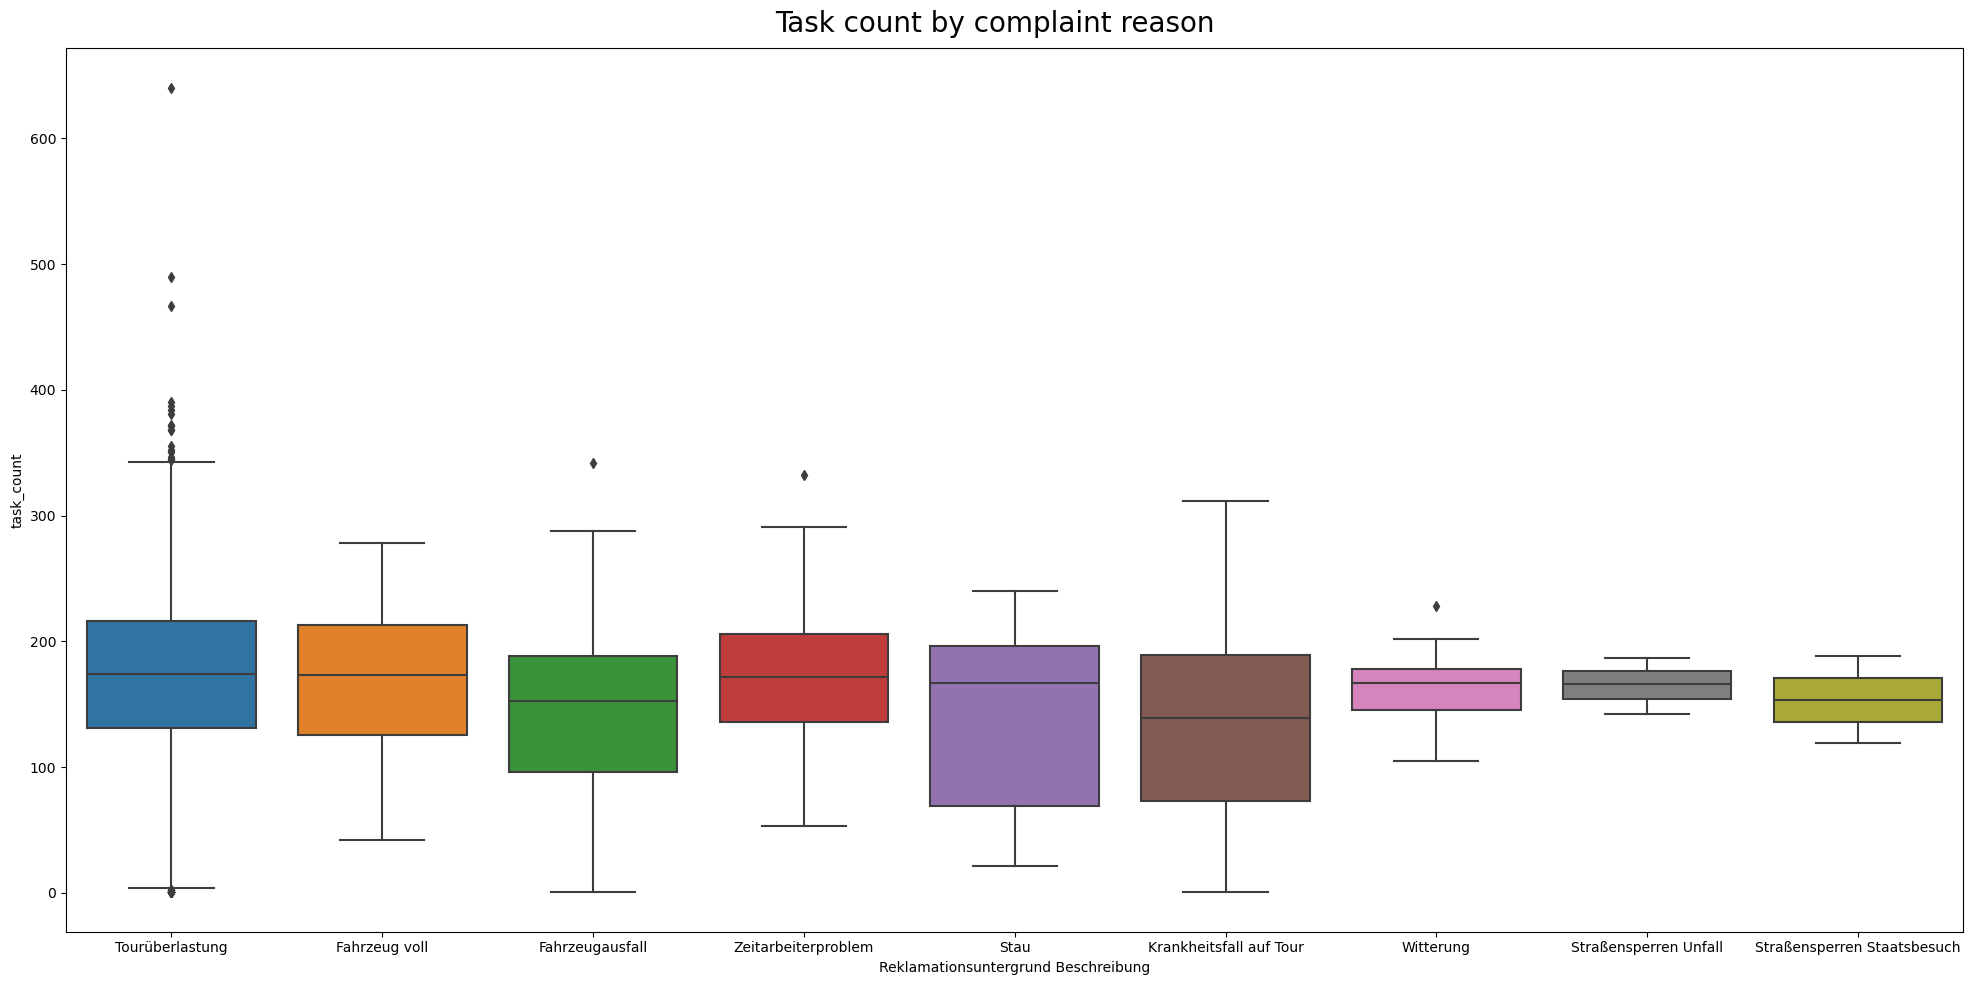

In [917]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x='Reklamationsuntergrund Beschreibung', y='task_count', data=everything_table)
fig.suptitle('Task count by complaint reason', fontsize=20)
plt.tight_layout()

In [939]:
everything_table['temperature_2m_mean (°C)'].unique()

array([  6,   9,   8,   4,   2,   3,   7,   5,   0,  -2,  -3,  -6,  -4,
        -1,   1,  11,  10,  13,  12,  15,  17,  18,  14,  16,  20,  19,
        21,  22,  23,  24,  25,  27,  -5,  -7,  26,  30,  -8,  28,  -9,
       -10])

In [938]:
everything_table['temperature_2m_mean (°C)'] = pd.to_numeric(everything_table['temperature_2m_mean (°C)'], errors='coerce').round().astype(int)

ValueError: invalid literal for int() with base 10: '5.5'

In [930]:
everything_table.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),cancelled
0,79785,2023-12-31,MONU,180,TM00100,NaN,NaN,00:00:00,00:00:00,BR_MONU,2023,December,12,Sunday,31,TM,1.0,1.0,3.0,2.600000,1.916667,NaN,61,5.5,1.70,0.00,4.0,0
1,12084,2023-12-30,MONU,134,TP00346,NaN,NaN,05:58:42,11:40:59,BR_MONU,2023,December,12,Saturday,30,TP,0.0,1.0,2.0,2.107831,159.131274,170.0,61,6.2,2.80,0.00,6.0,0
2,93972,2023-12-30,MONU,35,TG00022,A234593588,Tourüberlastung,05:18:53,13:22:40,BR_WESTH,2023,December,12,Saturday,30,TG,1.0,1.0,2.0,2.077632,143.213720,59.0,61,6.2,2.80,0.00,6.0,1
3,11265,2023-12-30,MONU,86,TM00011,NaN,NaN,05:11:20,10:36:55,BR_MONU,2023,December,12,Saturday,30,TM,0.0,1.0,2.0,2.002535,53.933673,69.0,61,6.2,2.80,0.00,6.0,0
4,70895,2023-12-30,MONU,20,TP00117,NaN,NaN,05:37:01,14:11:57,BR_WESTH,2023,December,12,Saturday,30,TP,1.0,1.0,3.0,2.261787,228.166244,221.0,61,6.2,2.80,0.00,6.0,0


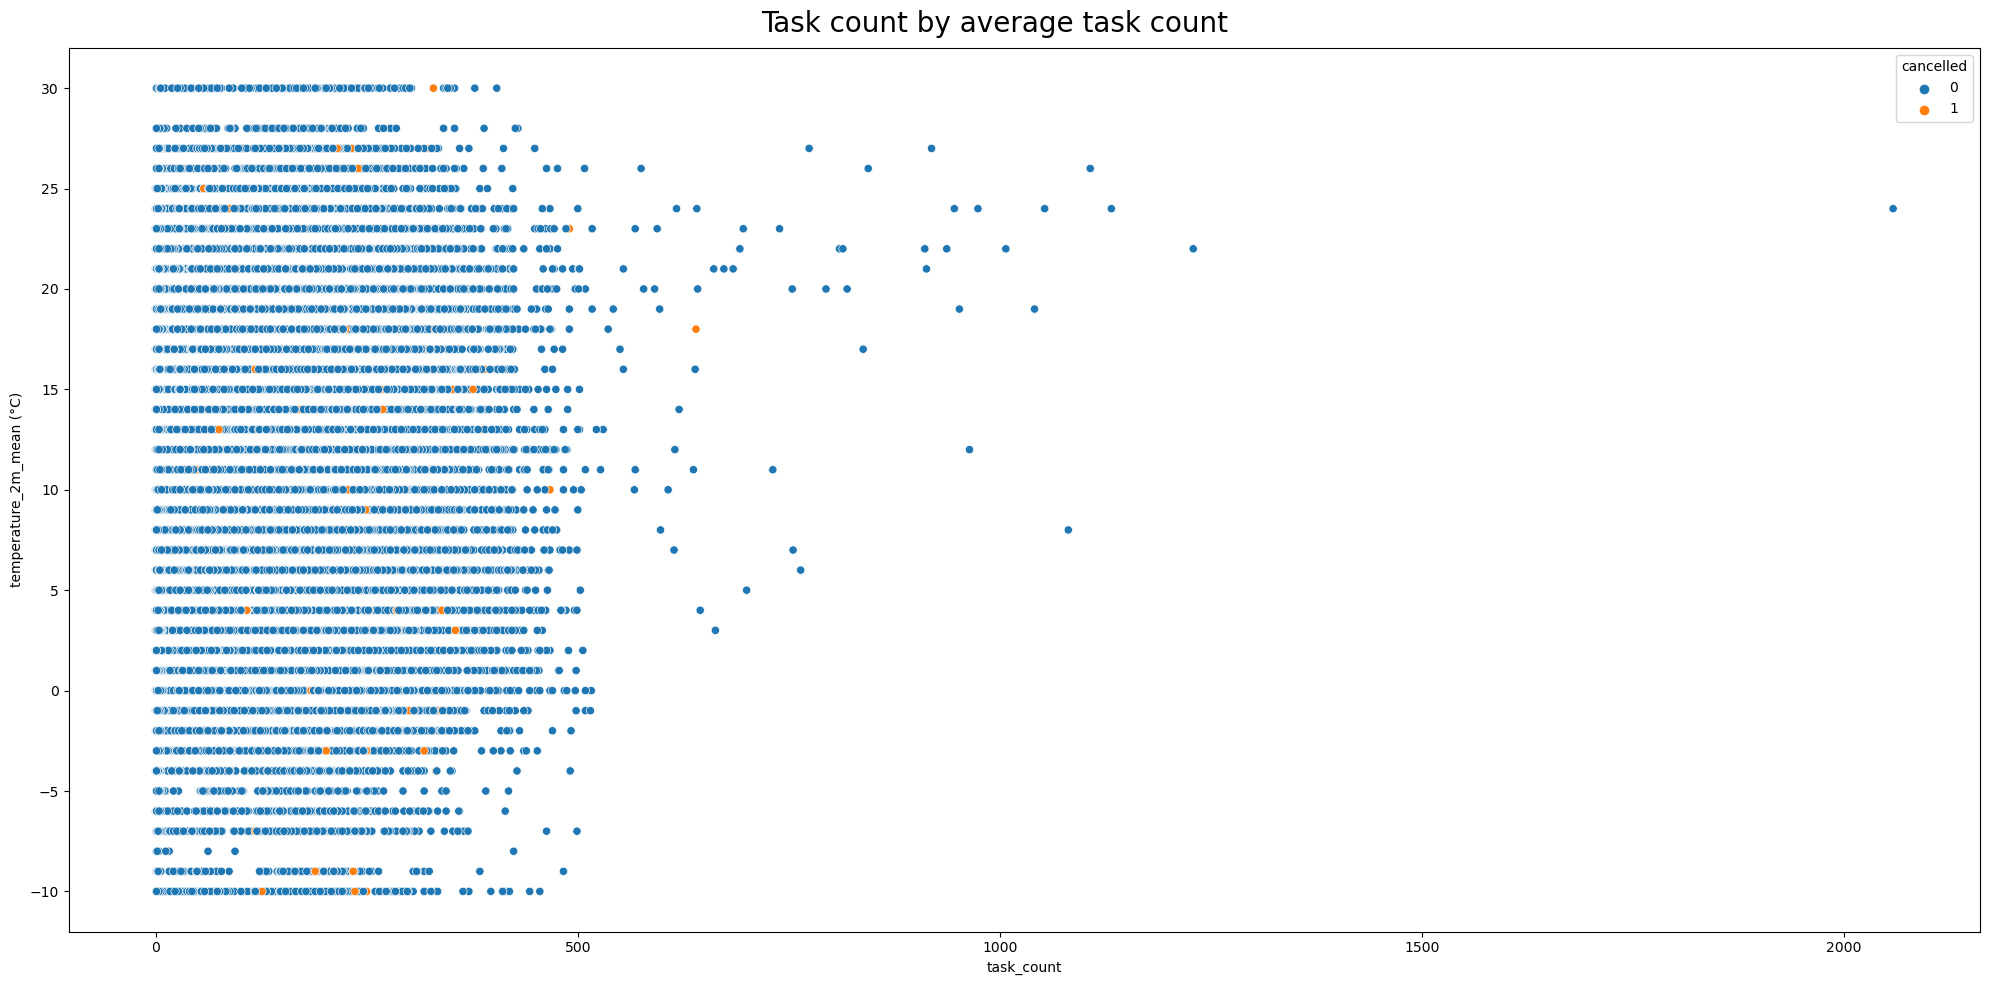

In [941]:
fig= plt.figure(figsize=(20,10))
sns.scatterplot(x='task_count', y='temperature_2m_mean (°C)', hue='cancelled', data=everything_table)
fig.suptitle('Task count by average task count', fontsize=20)
plt.tight_layout()
plt.show()